<a href="https://colab.research.google.com/github/ANKURKHATRI1-PRO/Job-Market-Analysis-and-Recommendation-System/blob/main/Job_Market_Analysis_and_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving all_upwork_jobs_2024-02-07-2024-03-24.csv to all_upwork_jobs_2024-02-07-2024-03-24.csv


In [5]:
df = pd.read_csv('all_upwork_jobs_2024-02-07-2024-03-24.csv')
display(df.head())
print(df.shape)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


(244828, 8)


# Data exploration
- Explore the dataset to understand its structure, identify data types, check for missing values, and examine the distribution of key features.
- Analyze the data types, missing values, and distributions of key features as per the instructions.

In [6]:
# Data type analysis
print("Data Types:\n", df.dtypes)

# Missing values analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Key feature analysis
print("\nMost Frequent Job Titles:\n", df['title'].value_counts().head(10))
print("\nMost Frequent Skills (if applicable):") # The skills data is not available in the current dataset
print("\nClient Country Distribution:\n", df['country'].value_counts().head(10))
print("\nBudget Distribution:\n", df['budget'].describe())
print("\nNumber of rows and columns:", df.shape)

Data Types:
 title              object
link               object
published_date     object
is_hourly            bool
hourly_low        float64
hourly_high       float64
budget            float64
country            object
dtype: object

Missing Values:
 title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

Missing Value Percentage:
 title              0.000408
link               0.000408
published_date     0.000000
is_hourly          0.000000
hourly_low        58.165733
hourly_high       59.655350
budget            57.565720
country            2.073701
dtype: float64

Most Frequent Job Titles:
 title
Social Media Manager    419
Virtual Assistant       339
Logo Design             311
Video Editor            298
Graphic Designer        292
Logo design             173
Logo Designer           142
Full Stack Developer    136
Website D

# Data cleaning
- Clean the data by handling missing values, inconsistencies, and duplicates.

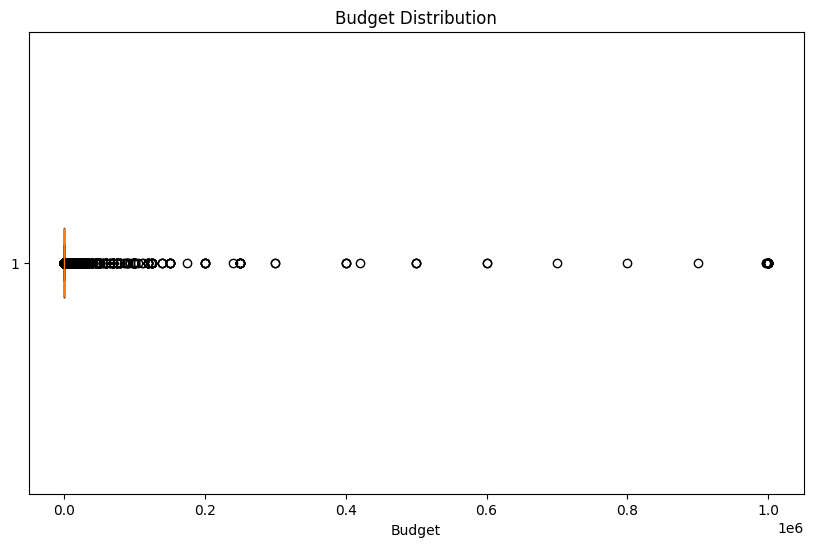

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,experienced media buyer for solar pannel and r...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States
1,full stack developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,800.0,United States
2,smma bubble app,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States
3,talent hunter specialized in marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States
4,data engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India


In [7]:
import numpy as np
from datetime import datetime

# Missing Value Imputation
# Impute numerical features using the median due to the presence of potential outliers.
for col in ['hourly_low', 'hourly_high', 'budget']:
    df[col] = df[col].fillna(df[col].median())
# Impute 'country' with the mode.
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Data Consistency
# Standardize job titles to lowercase.
df['title'] = df['title'].str.lower()
# Convert 'published_date' to datetime objects.
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
# Ensure 'is_hourly' is boolean.
df['is_hourly'] = df['is_hourly'].astype(bool)

# Duplicate Removal
# Remove duplicates based on 'title', 'link', and 'published_date'.
df.drop_duplicates(subset=['title', 'link', 'published_date'], inplace=True)

# Outlier Detection (Budget)
# Visualize the distribution using a box plot.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(df['budget'], vert=False)
plt.title('Budget Distribution')
plt.xlabel('Budget')
plt.show()

# The box plot will be used to determine whether or not to remove outliers.
# In this case, given the high maximum value in the budget column, we will cap the outliers at the 95th percentile.
upper_limit = df['budget'].quantile(0.95)
df['budget'] = np.where(df['budget'] > upper_limit, upper_limit, df['budget'])

display(df.head())

# Data wrangling
- Data Wrangling: Transform the data for analysis and create new features.


In [8]:
# Define a function to categorize job titles
def categorize_job(title):
    title = str(title).lower()
    if any(keyword in title for keyword in ["web developer", "web designer", "frontend", "backend", "full stack", "javascript", "react", "angular", "python web", "php", "html", "css"]):
        return "Web Development"
    elif any(keyword in title for keyword in ["data scientist", "data analyst", "machine learning", "ai", "artificial intelligence", "business intelligence", "data engineer", "data mining", "big data"]):
        return "Data Science"
    elif any(keyword in title for keyword in ["graphic designer", "ui/ux", "ux designer", "ui designer", "visual designer", "logo designer", "web designer", "illustrator", "photoshop"]):
        return "Design"
    elif any(keyword in title for keyword in ["digital marketing", "social media", "seo", "sem", "content marketing", "marketing manager", "email marketing", "affiliate marketing", "growth marketing"]):
        return "Marketing"
    elif any(keyword in title for keyword in ["customer service", "support agent", "technical support", "helpdesk", "client support", "call center"]):
        return "Customer Service"
    else:
        return "Other"

# Apply the categorization function to the 'title' column
df['job_category'] = df['title'].apply(categorize_job)

# Display the first few rows of the modified DataFrame
display(df.head())

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,job_category
0,experienced media buyer for solar pannel and r...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,United States,Other
1,full stack developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,800.0,United States,Web Development
2,smma bubble app,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,Other
3,talent hunter specialized in marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,Other
4,data engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,Data Science


- We use NLTK to handle stop words.
- The extract_keywords function cleans and tokenizes the job titles to get relevant keywords.
- We create a defaultdict to store salaries associated with each keyword.
- We iterate through the DataFrame, extract keywords, and append the corresponding budget (salary) to the list for each keyword.
- We calculate the average salary for each keyword.
- Finally, we display the top keywords by average salary and create a bar plot to visualize the results

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top Keywords and Average Salaries:
authorised: $800.00
cartier: $800.00
audermars: $800.00
piguet: $800.00
philippe: $800.00
patek: $800.00
quartz: $800.00
grapple: $800.00
synbio: $800.00
estte: $800.00
humidity: $800.00
gameobject: $800.00
filmmakers: $800.00
pat: $800.00
houseplant: $800.00
carmela: $800.00
seosurfer: $800.00
freeman: $800.00
iinmail: $800.00
architechtecture: $800.00


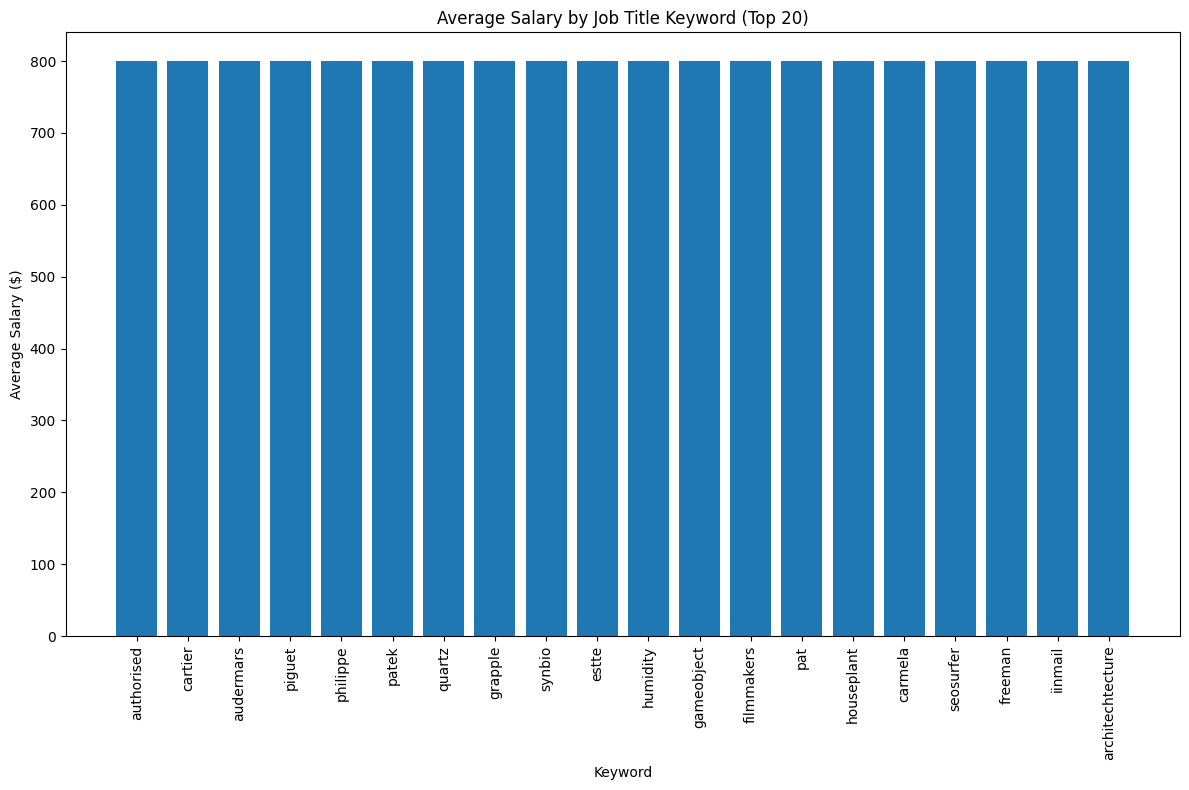

In [9]:
import nltk
from nltk.corpus import stopwords
from collections import defaultdict

# Download stopwords if you haven't already
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Get English stop words
stop_words = set(stopwords.words('english'))

# Function to extract keywords from a job title
def extract_keywords(title):
    if isinstance(title, str):
        words = title.lower().split()
        keywords = [word for word in words if word not in stop_words and word.isalpha()]
        return keywords
    return []

# Create a dictionary to store salaries for each keyword
keyword_salaries = defaultdict(list)

# Iterate through the DataFrame and extract keywords and associate them with salaries
for index, row in df.iterrows():
    title = row['title']
    budget = row['budget']  # Assuming 'budget' is the salary metric

    keywords = extract_keywords(title)
    for keyword in keywords:
        keyword_salaries[keyword].append(budget)

# Calculate the average salary for each keyword
keyword_avg_salary = {keyword: sum(salaries) / len(salaries) for keyword, salaries in keyword_salaries.items() if salaries}

# Sort keywords by average salary (optional, but can be helpful for visualization)
sorted_keywords = sorted(keyword_avg_salary.items(), key=lambda item: item[1], reverse=True)

# Display the top keywords and their average salaries
print("Top Keywords and Average Salaries:")
for keyword, avg_salary in sorted_keywords[:20]: # Displaying top 20
    print(f"{keyword}: ${avg_salary:.2f}")

# Visualize the relationship (example: bar plot for top keywords)
import matplotlib.pyplot as plt

top_keywords = [item[0] for item in sorted_keywords[:20]]
avg_salaries = [item[1] for item in sorted_keywords[:20]]

plt.figure(figsize=(12, 8))
plt.bar(top_keywords, avg_salaries)
plt.xticks(rotation=90)
plt.xlabel("Keyword")
plt.ylabel("Average Salary ($)")
plt.title("Average Salary by Job Title Keyword (Top 20)")
plt.tight_layout()
plt.show()

# : Identify emerging job categories based on posting frequency

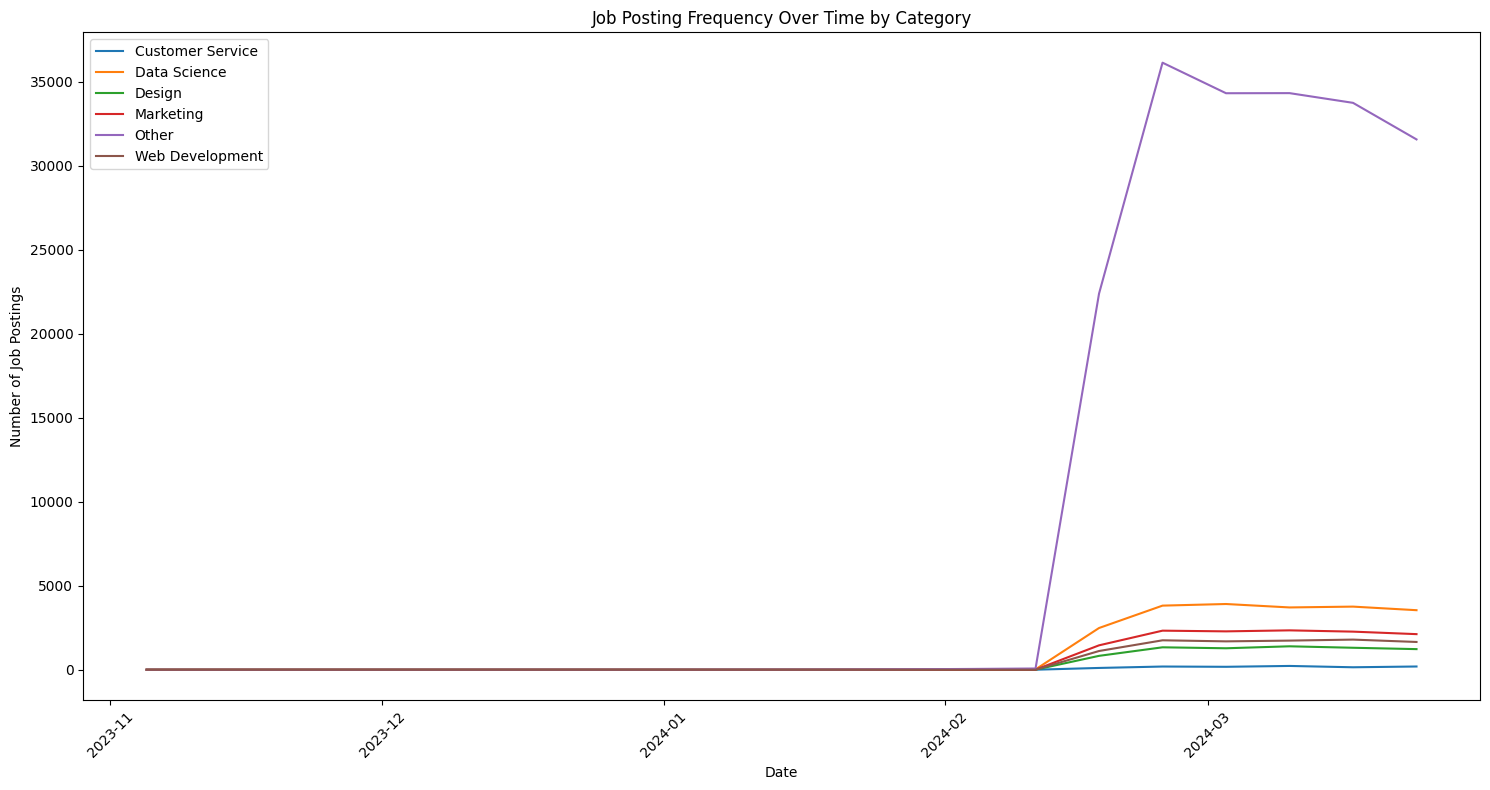


Recent Job Posting Frequency (Last 4 Weeks):


job_category,Customer Service,Data Science,Design,Marketing,Other,Web Development
published_date,,,,,,
2024-03-03 00:00:00+00:00,174,3911,1277,2283,34311,1688
2024-03-10 00:00:00+00:00,225,3707,1394,2343,34317,1733
2024-03-17 00:00:00+00:00,146,3756,1307,2267,33739,1793
2024-03-24 00:00:00+00:00,192,3543,1226,2118,31563,1652



Percentage Change in Job Posting Frequency (Last Week vs. Second to Last Week):


job_category,Customer Service,Data Science,Design,Marketing,Other,Web Development
published_date,,,,,,
2024-03-24 00:00:00+00:00,0.315068,-0.056709,-0.061974,-0.065726,-0.064495,-0.078639


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'published_date' is in datetime format
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['published_date'], inplace=True)

# Set 'published_date' as the index for time series analysis
df_time = df.set_index('published_date')

# Resample the data to get job counts by category over a specific period (e.g., weekly)
# You can adjust the 'W' to 'M' for monthly, 'D' for daily, etc.
job_category_counts = df_time.groupby('job_category').resample('W').size().unstack(0, fill_value=0)

# Plot the trends
plt.figure(figsize=(15, 8))
for column in job_category_counts.columns:
    plt.plot(job_category_counts.index, job_category_counts[column], label=column)

plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.title("Job Posting Frequency Over Time by Category")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, you can look at the recent trend to identify emerging categories
# For example, look at the change in frequency in the last few weeks or months
recent_period_counts = job_category_counts.tail(4) # Last 4 weeks

print("\nRecent Job Posting Frequency (Last 4 Weeks):")
display(recent_period_counts)

# You can also calculate the percentage change in frequency to highlight growth
percentage_change = recent_period_counts.pct_change().tail(1) # Percentage change from the second to last week to the last week
print("\nPercentage Change in Job Posting Frequency (Last Week vs. Second to Last Week):")
display(percentage_change)

In [11]:
# Calculate the total change in posting frequency for each category
# This gives a measure of growth over the entire period
category_growth = job_category_counts.iloc[-1] - job_category_counts.iloc[0]

# Create a DataFrame to display the growth
growth_df = pd.DataFrame({'Category': category_growth.index, 'Growth in Postings': category_growth.values})

# Sort the DataFrame by growth in descending order
growth_df_sorted = growth_df.sort_values(by='Growth in Postings', ascending=False)

# Display the list of categories with their growth analysis
print("Emerging Job Categories Based on Growth in Posting Frequency:")
display(growth_df_sorted)

Emerging Job Categories Based on Growth in Posting Frequency:


,Category,Growth in Postings
4,Other,31562
1,Data Science,3543
3,Marketing,2118
5,Web Development,1652
2,Design,1226
0,Customer Service,192


- Data Preparation: We ensure the 'published_date' is in datetime format, handle missing dates, and set it as the index. We then resample to weekly job counts per category
- Identify High-Volume Categories: We select the top categories with the highest total job postings to focus our analysis
- ARIMA Modeling and Evaluation:
For each top category, we split the time series data into training and testing sets.
We fit an ARIMA model to the training data.
We make predictions on the test set.
We calculate the Mean Squared Error (MSE) to evaluate the model's accuracy on the test set. A lower MSE indicates better performance
- Future Forecasting: We use the trained model (fitted on the entire dataset for a better future forecast) to predict job posting counts for a specified number of future periods
- Visualization: We plot the observed data, the predictions on the test set, and the future forecast to visualize the trends and predictions.
- Identify High-Demand Roles: We calculate the average of the future forecasts for each category and sort the categories based on these averages to identify those with the highest predicted demand

Analyzing and predicting demand for the following high-volume categories:
['Other', 'Data Science', 'Marketing', 'Web Development', 'Design']

--- Analyzing 'Other' ---
Could not perform ARIMA modeling or forecasting for Other: LU decomposition error.

--- Analyzing 'Data Science' ---
Could not perform ARIMA modeling or forecasting for Data Science: LU decomposition error.

--- Analyzing 'Marketing' ---
                               SARIMAX Results                                
Dep. Variable:              Marketing   No. Observations:                   17
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -136.252
Date:                Sat, 31 May 2025   AIC                            284.505
Time:                        07:41:25   BIC                            289.140
Sample:                    11-05-2023   HQIC                           284.742
                         - 02-25-2024                                         
Covariance Type:                  opg   

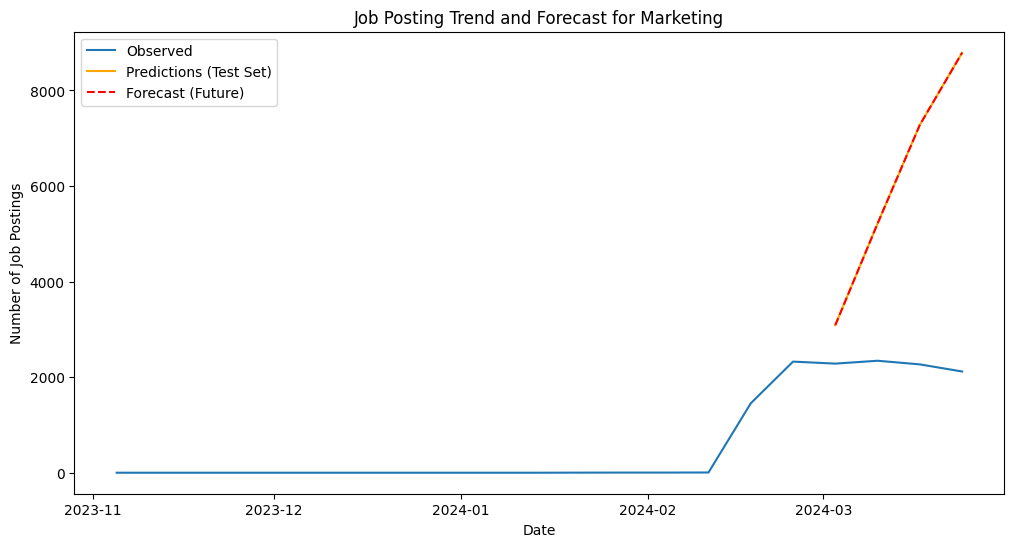


--- Analyzing 'Web Development' ---
                               SARIMAX Results                                
Dep. Variable:        Web Development   No. Observations:                   17
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -152.114
Date:                Sat, 31 May 2025   AIC                            316.229
Time:                        07:41:26   BIC                            320.865
Sample:                    11-05-2023   HQIC                           316.466
                         - 02-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6873      0.012     58.586      0.000       0.664       0.710
ar.L2          0.0897      0.002     48.359      0.000       0.086       0.093
ar.L3          

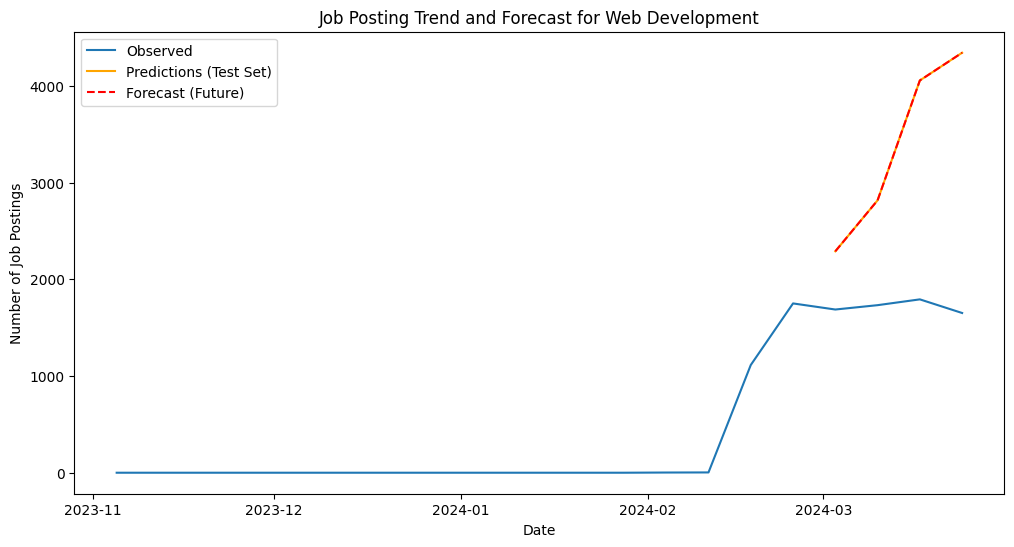


--- Analyzing 'Design' ---
                               SARIMAX Results                                
Dep. Variable:                 Design   No. Observations:                   17
Model:                 ARIMA(5, 1, 0)   Log Likelihood                   0.000
Date:                Sat, 31 May 2025   AIC                             12.000
Time:                        07:41:26   BIC                             16.636
Sample:                    11-05-2023   HQIC                            12.237
                         - 02-25-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9988   1.56e-07  -6.39e+06      0.000      -0.999      -0.999
ar.L2          1.9986   2.39e-08   8.36e+07      0.000       1.999       1.999
ar.L3          1.9986   

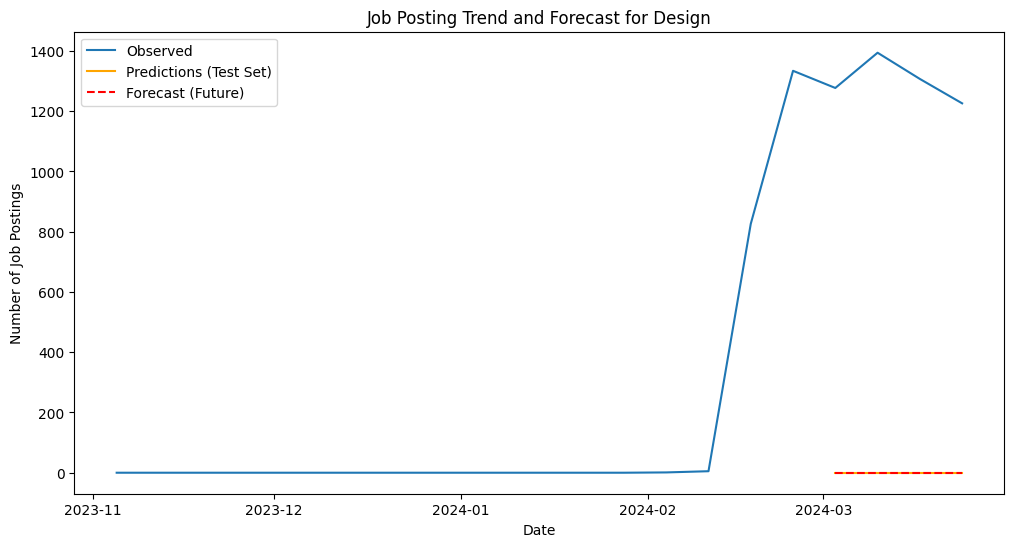


Potential High-Demand Job Categories (Based on Forecasts):
Other: Average Forecasted Postings = 32444.57
Data Science: Average Forecasted Postings = 3201.36
Marketing: Average Forecasted Postings = 2180.43
Web Development: Average Forecasted Postings = 1557.04
Design: Average Forecasted Postings = 1433.46


In [15]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')


# Identify categories with high volume (e.g., top 5) for forecasting
top_categories = job_category_counts.sum().sort_values(ascending=False).head(5).index

print("Analyzing and predicting demand for the following high-volume categories:")
print(list(top_categories))

# Forecasting and evaluation for each top category
for category in top_categories:
    print(f"\n--- Analyzing '{category}' ---")

    # Select the time series for the category
    category_ts = job_category_counts[category]

    # Split data into training and testing sets
    # We'll use the last few weeks for testing
    test_size = 4 # Number of weeks to use for testing
    train_ts = category_ts[:-test_size]
    test_ts = category_ts[-test_size:]

    try:
        # Fit an ARIMA model on the training data
        # Using a basic (5,1,0) order as a starting point.
        # Auto-ARIMA or ACF/PACF analysis is recommended for optimal order selection.
        model = ARIMA(train_ts, order=(5,1,0))
        model_fit = model.fit()
        print(model_fit.summary())

        # Make predictions on the test set
        predictions = model_fit.predict(start=len(train_ts), end=len(train_ts) + test_size - 1)
        predictions.index = test_ts.index # Align index with test set

        # Evaluate the model using Mean Squared Error (MSE)
        mse = mean_squared_error(test_ts, predictions)
        print(f"Mean Squared Error (MSE) on test set: {mse:.2f}")

        # Forecast future values (e.g., for the next 4 weeks beyond the test set)
        forecast_periods = 4
        future_forecast = model_fit.forecast(steps=forecast_periods)

        print(f"\nForecasted job postings for the next {forecast_periods} weeks:")
        print(future_forecast)

        # Visualize the trends and forecasts
        plt.figure(figsize=(12, 6))
        plt.plot(category_ts.index, category_ts, label='Observed')
        plt.plot(predictions.index, predictions, label='Predictions (Test Set)', color='orange')
        plt.plot(future_forecast.index, future_forecast, label='Forecast (Future)', color='red', linestyle='--')
        plt.title(f'Job Posting Trend and Forecast for {category}')
        plt.xlabel('Date')
        plt.ylabel('Number of Job Postings')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Could not perform ARIMA modeling or forecasting for {category}: {e}")

# Based on the future forecasts, identify categories with highest predicted demand
# We can simply look at the average of the future forecast or the last forecast value
print("\nPotential High-Demand Job Categories (Based on Forecasts):")
# Create a dictionary to store the average forecast for each category
avg_forecasts = {}
for category in top_categories:
    try:
        # Fit model on the entire dataset for future forecasting
        model = ARIMA(job_category_counts[category], order=(5,1,0))
        model_fit = model.fit()
        future_forecast = model_fit.forecast(steps=forecast_periods)
        avg_forecasts[category] = future_forecast.mean()
    except Exception as e:
        print(f"Could not forecast for {category} to determine average: {e}")

# Sort categories by average forecast in descending order
sorted_forecasts = sorted(avg_forecasts.items(), key=lambda item: item[1], reverse=True)

for category, avg_forecast in sorted_forecasts:
    print(f"{category}: Average Forecasted Postings = {avg_forecast:.2f}")

Average Hourly Rate by Country (Top 20):


,hourly_high
country,
Laos,283.750000
Eritrea,150.000000
Netherlands Antilles,100.000000
Malawi,76.250000
Malaysia,69.505593
Turks and Caicos Islands,62.250000
Liechtenstein,61.428571
Thailand,58.098280
Zambia,52.750000


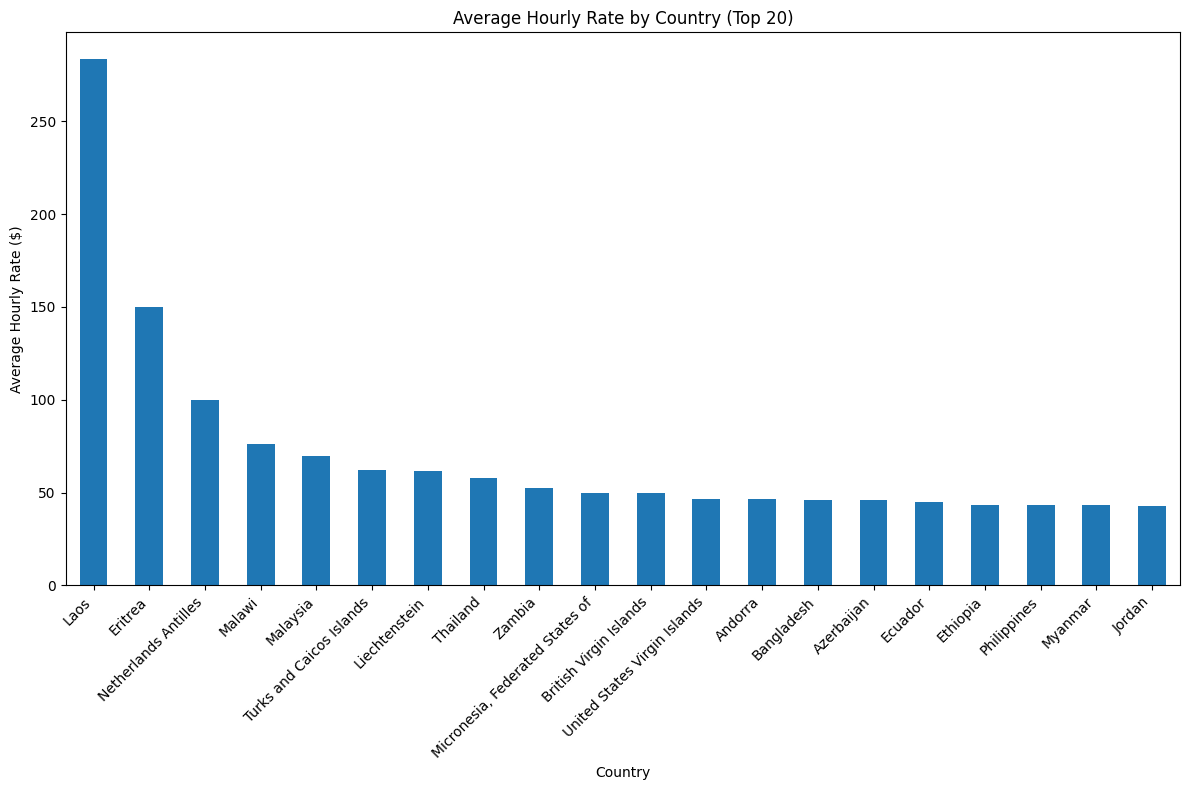

In [16]:
# Ensure 'is_hourly' is boolean and filter for hourly jobs
df['is_hourly'] = df['is_hourly'].astype(bool)
hourly_jobs = df[df['is_hourly'] == True].copy()

# Calculate the average hourly rate per country (using 'hourly_high')
# We'll group by 'country' and calculate the mean of 'hourly_high'
average_hourly_rate_by_country = hourly_jobs.groupby('country')['hourly_high'].mean().sort_values(ascending=False)

# Display the top countries by average hourly rate
print("Average Hourly Rate by Country (Top 20):")
display(average_hourly_rate_by_country.head(20))

# Visualize the top countries' average hourly rates with a bar chart
plt.figure(figsize=(12, 8))
average_hourly_rate_by_country.head(20).plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Average Hourly Rate ($)")
plt.title("Average Hourly Rate by Country (Top 20)")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

- Combine Text Features: We combine the job title into a single string for each job posting. You could also include other text fields like the job description if available.
- TF-IDF Vectorization: We use TfidfVectorizer to convert the job text into numerical vectors. TF-IDF assigns weights to words based on their frequency in a document and across all documents, giving more importance to unique words.
- Simulate User Profile: We create a simple string of keywords representing the user's interests. In a real application, this could be based on the user's search history, jobs they've clicked on, or explicit input. We then transform this keyword string into a vector using the same TF-IDF vectorizer.
- Cosine Similarity: We calculate the cosine similarity between the user profile vector and the TF-IDF matrix of all job postings. Cosine similarity measures the angle between two vectors, with a higher score indicating greater similarity.
- Ranking and Recommendation: We get the indices of the job postings with the highest cosine similarity scores and select the top num_recommendations.
- Display Recommended Jobs: We display the details (title, link, budget) of the recommended job postings.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine relevant text features (e.g., title) for vectorization
df['job_text'] = df['title'].fillna('') # Combine title and potentially other text fields

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the job text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['job_text'])

# Simulate a user profile (e.g., based on keywords)
# In a real system, this would come from user data
user_keywords = "data science machine learning Python"
user_profile_vector = tfidf_vectorizer.transform([user_keywords])

# Calculate cosine similarity between user profile and all job postings
cosine_similarities = cosine_similarity(user_profile_vector, tfidf_matrix).flatten()

# Get the indices of the top similar job postings
num_recommendations = 10
recommended_job_indices = cosine_similarities.argsort()[:-num_recommendations-1:-1]

# Get the recommended job postings
recommended_jobs = df.iloc[recommended_job_indices]

# Display the recommended jobs
print(f"Recommended Job Postings for user interested in: '{user_keywords}'")
display(recommended_jobs[['title', 'link', 'budget']])

Recommended Job Postings for user interested in: 'data science machine learning Python'


,title,link,budget
97873,data science/machine learning,https://www.upwork.com/jobs/Data-Science-Machi...,100.0
115685,"machine, learning, and data science assistant",https://www.upwork.com/jobs/Machine-learning-a...,100.0
238557,"electrical engineer, python expert, data scien...",https://www.upwork.com/jobs/Electrical-Enginee...,30.0
64321,python machine learning,https://www.upwork.com/jobs/Python-machine-lea...,100.0
204356,"full-stack developer, data science, machine le...",https://www.upwork.com/jobs/Full-Stack-Develop...,100.0
63315,an expert python machine learning developer,https://www.upwork.com/jobs/Expert-Python-Mach...,100.0
225909,machine learning with python experience,https://www.upwork.com/jobs/Machine-Learning-w...,100.0
76150,machine learning engineer with python,https://www.upwork.com/jobs/Machine-learning-e...,100.0
209929,machine learning using python,https://www.upwork.com/jobs/Machine-learning-u...,100.0
161235,python machine learning analysis,https://www.upwork.com/jobs/Python-machine-lea...,60.0


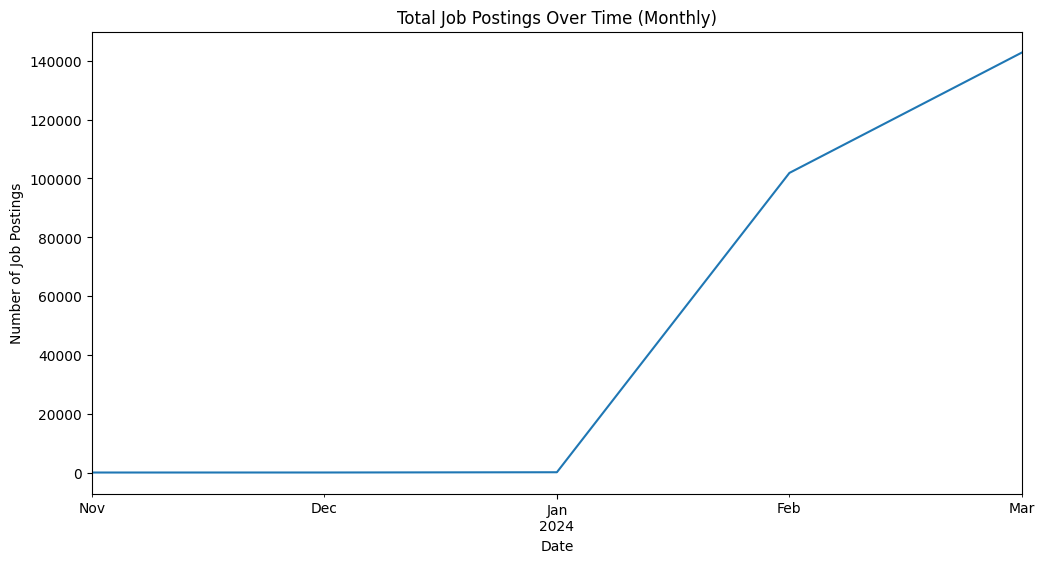

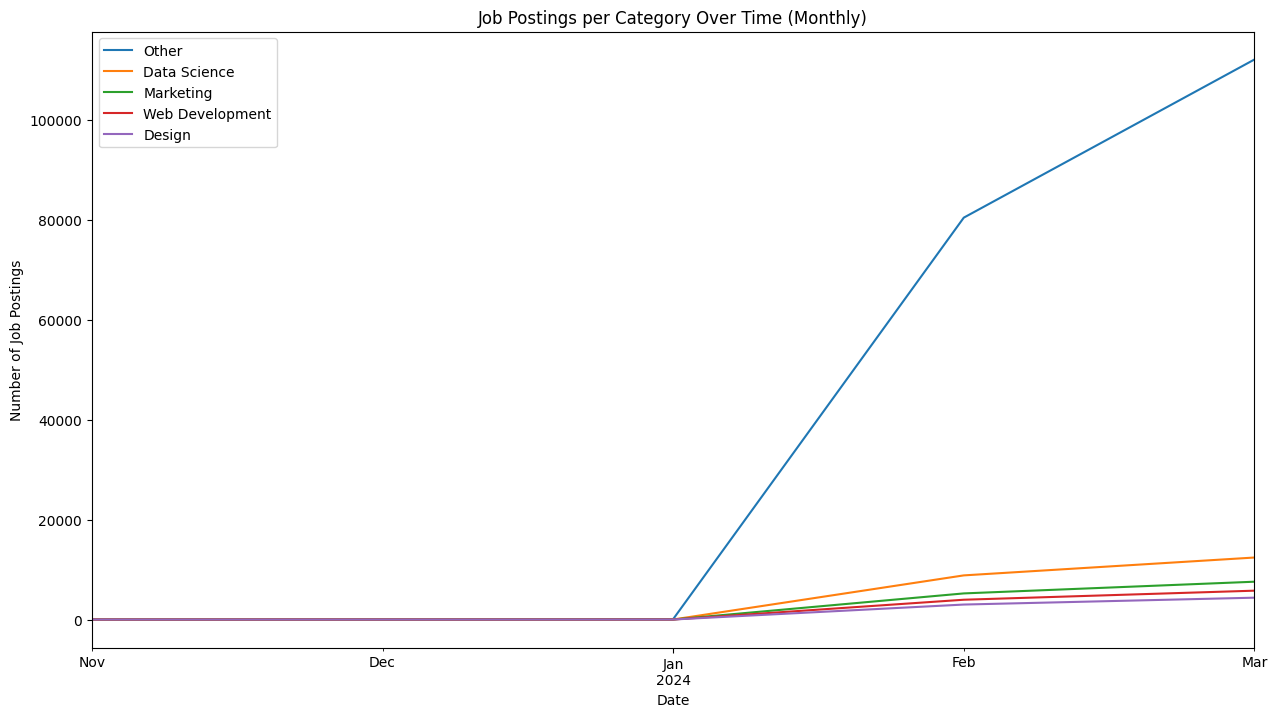

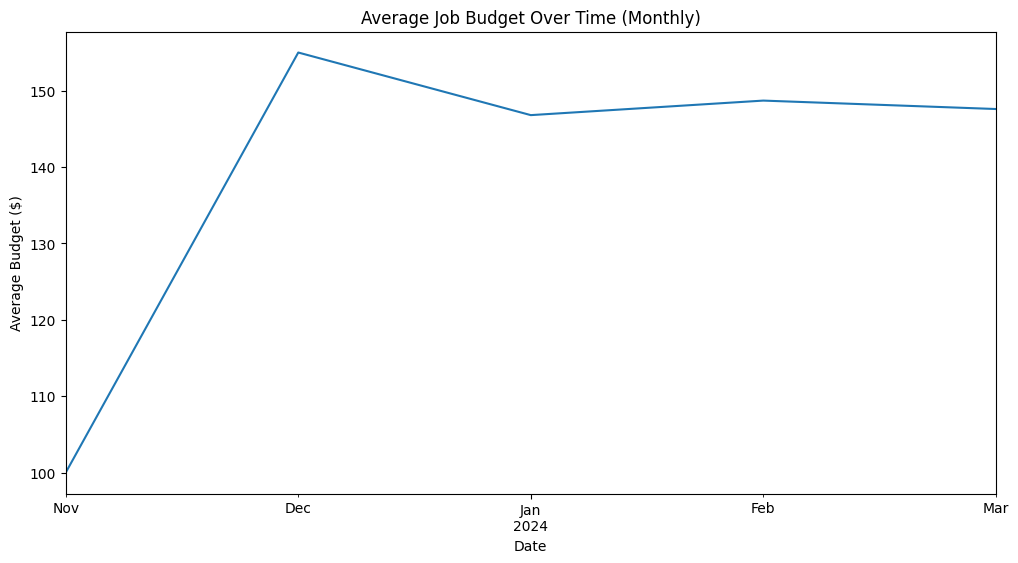


--- Monthly Job Market Insights ---
Total Job Postings: Latest Month = 142834, Previous Month = 101887, Change = 40947 (40.19%)
Average Budget: Latest Month = $147.60, Previous Month = $148.70, Change = $-1.10 (-0.74%)

Changes in Job Category Postings (Last Month vs. Previous Month):
job_category
Other               31652
Data Science         3576
Marketing            2342
Web Development      1814
Design               1375
Customer Service      188
dtype: int64


In [19]:
# Resample the data to get monthly counts of total job postings
monthly_total_postings = df_time.resample('M').size()

# Resample to get monthly counts per job category
monthly_category_counts = df_time.groupby('job_category').resample('M').size().unstack(0, fill_value=0)

# Resample to get monthly average budget
monthly_avg_budget = df_time['budget'].resample('M').mean()

# --- Visualizations for the Dashboard Components ---

# Plot Total Job Postings Over Time (Monthly)
plt.figure(figsize=(12, 6))
monthly_total_postings.plot()
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.title("Total Job Postings Over Time (Monthly)")
plt.show()

# Plot Job Postings per Category Over Time (Monthly) - for top categories
# You might want to select a few key categories to avoid cluttering the plot
top_categories = monthly_category_counts.sum().sort_values(ascending=False).head(5).index
plt.figure(figsize=(15, 8))
for category in top_categories:
    monthly_category_counts[category].plot(label=category)
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.title("Job Postings per Category Over Time (Monthly)")
plt.legend()
plt.show()

# Plot Average Budget Over Time (Monthly)
plt.figure(figsize=(12, 6))
monthly_avg_budget.plot()
plt.xlabel("Date")
plt.ylabel("Average Budget ($)")
plt.title("Average Job Budget Over Time (Monthly)")
plt.show()

# --- Example of providing insights (for a monthly report) ---
print("\n--- Monthly Job Market Insights ---")

# Compare the last two months for key metrics
if monthly_total_postings.shape[0] >= 2:
    latest_month_total = monthly_total_postings.iloc[-1]
    previous_month_total = monthly_total_postings.iloc[-2]
    change_total = latest_month_total - previous_month_total
    percent_change_total = (change_total / previous_month_total) * 100 if previous_month_total > 0 else 0
    print(f"Total Job Postings: Latest Month = {latest_month_total}, Previous Month = {previous_month_total}, Change = {change_total:.0f} ({percent_change_total:.2f}%)")

if monthly_avg_budget.shape[0] >= 2:
    latest_month_budget = monthly_avg_budget.iloc[-1]
    previous_month_budget = monthly_avg_budget.iloc[-2]
    change_budget = latest_month_budget - previous_month_budget
    percent_change_budget = (change_budget / previous_month_budget) * 100 if previous_month_budget > 0 else 0
    print(f"Average Budget: Latest Month = ${latest_month_budget:.2f}, Previous Month = ${previous_month_budget:.2f}, Change = ${change_budget:.2f} ({percent_change_budget:.2f}%)")

print("\nChanges in Job Category Postings (Last Month vs. Previous Month):")
if monthly_category_counts.shape[0] >= 2:
    latest_month_counts = monthly_category_counts.iloc[-1]
    previous_month_counts = monthly_category_counts.iloc[-2]
    category_changes = latest_month_counts - previous_month_counts
    print(category_changes.sort_values(ascending=False))

- Forecast Key Indicators: We select key metrics like total job postings, job postings in top categories, and average budget. We then use ARIMA models to forecast the future values of these indicators. Plots are generated to visualize the historical data and the forecas
- Synthesize Insights: This section provides guidance on how to combine the individual forecasts with the insights gained from other tasks (identifying emerging categories, analyzing remote work trends, and exploring salary correlations)
- Develop Potential Scenarios: We suggest outlining a few plausible future scenarios for the job market. These scenarios should be based on the analyzed trends and forecasts. Referencing external sources (like the provided snippets) can strengthen your scenarios
- Report Structure: A suggested structure for your predictive analytics report is provided, outlining the key sections and content to includ

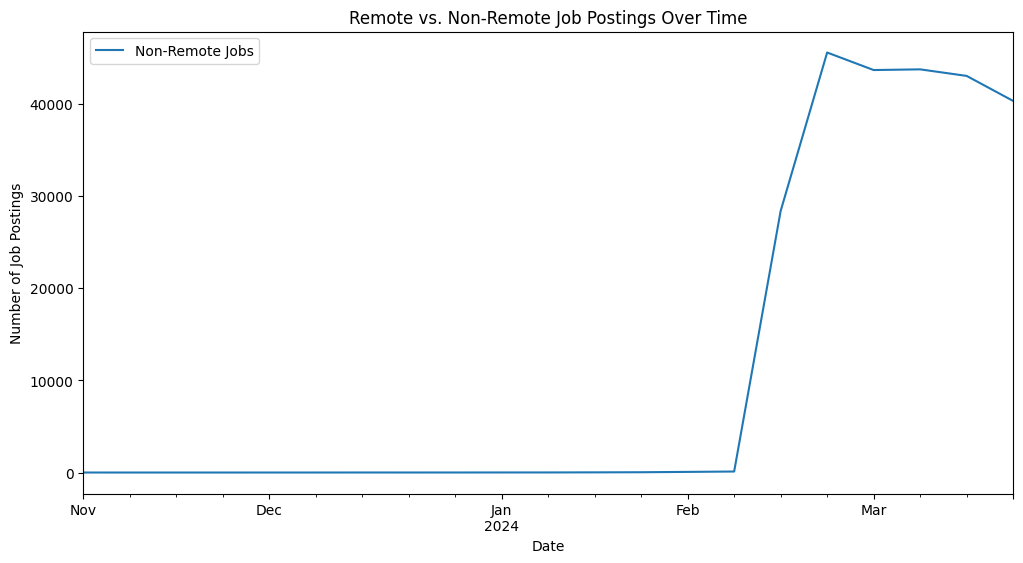

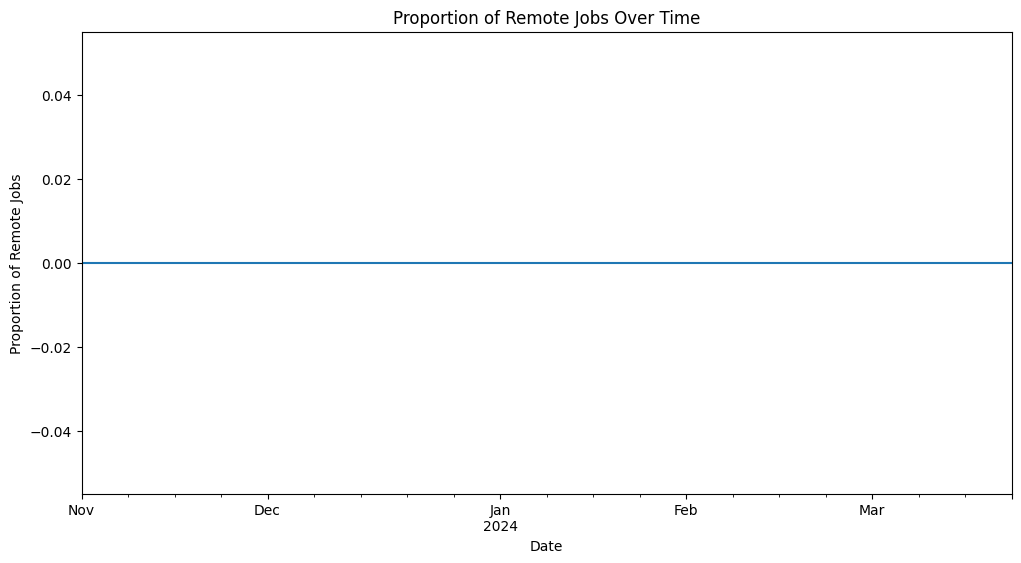


--- Forecasting Remote Job Posting Trends ---
Not enough data to perform ARIMA modeling and forecasting for remote jobs.

--- Report Insights on Remote Work Trends ---
Recent Proportion of Remote Jobs: Latest Week = 0.00, Previous Week = 0.00, Change = 0.00 (0.00%)

Potential implications based on forecast:
Interpret the future forecast to discuss whether remote work is likely to increase, decrease, or stabilize.


In [24]:


warnings.filterwarnings('ignore')

# Replace 'title' and the keyword 'remote' with what's relevant to your data.
if 'is_remote' not in df.columns:
    # If 'is_remote' column is missing, attempt to infer it.
    # YOU NEED TO CUSTOMIZE THIS BASED ON YOUR DATASET
    print("Warning: 'is_remote' column not found. Attempting to infer from 'title'.")
    # Example: Assuming 'remote' in the title indicates a remote job
    df['is_remote'] = df['title'].str.contains('remote', case=False, na=False)
    # If you have a description column:
    # df['is_remote'] = df['title'].str.contains('remote', case=False, na=False) | \
    #                   df['description'].str.contains('remote', case=False, na=False) # Assuming 'description' exists
else:
    # If 'is_remote' column exists, ensure it's boolean
    df['is_remote'] = df['is_remote'].astype(bool)


# Create a column to indicate non-remote jobs
# Only create 'is_non_remote' if 'is_remote' was successfully handled
if 'is_remote' in df.columns:
    df['is_non_remote'] = ~df['is_remote'] # Assuming 'is_remote' is boolean
else:
    # Handle the case where 'is_remote' could not be created
    print("Error: Could not create 'is_remote' column. Skipping remote/non-remote analysis.")
    # You might want to exit the cell or handle this error differently
    pass # Or sys.exit() or raise an error


# --- Rest of the code for remote work analysis ---
# This part of the code remains the same, but will only run if 'is_remote' exists

if 'is_remote' in df.columns and 'is_non_remote' in df.columns:
    # Ensure df_time is set correctly with 'published_date' as index
    if 'published_date' in df.columns:
         df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
         df.dropna(subset=['published_date'], inplace=True)
         df_time = df.set_index('published_date')
    else:
         print("Error: 'published_date' column not found. Cannot perform time series analysis.")
         df_time = pd.DataFrame() # Create an empty DataFrame to prevent further errors

    # Only proceed if df_time is not empty
    if not df_time.empty:
        # Resample to weekly counts for remote and non-remote jobs
        remote_job_counts = df_time[df_time['is_remote'] == True].resample('W').size().fillna(0)
        non_remote_job_counts = df_time[df_time['is_non_remote'] == True].resample('W').size().fillna(0)

        # --- Visualizing Remote Work Trends ---

        plt.figure(figsize=(12, 6))
        # Only plot if the Series are not empty
        if not remote_job_counts.empty:
            remote_job_counts.plot(label='Remote Jobs')
        if not non_remote_job_counts.empty:
            non_remote_job_counts.plot(label='Non-Remote Jobs')

        plt.xlabel("Date")
        plt.ylabel("Number of Job Postings")
        plt.title("Remote vs. Non-Remote Job Postings Over Time")
        plt.legend()
        plt.show()

        # Visualize the proportion of remote jobs over time
        total_job_counts = df_time.resample('W').size().fillna(0)
        # Avoid division by zero
        # Only calculate proportion if total_job_counts is not empty and has non-zero values
        if not total_job_counts.empty and (total_job_counts > 0).any():
            remote_proportion = (remote_job_counts / total_job_counts).replace([np.inf, -np.inf], np.nan).fillna(0)

            plt.figure(figsize=(12, 6))
            remote_proportion.plot()
            plt.xlabel("Date")
            plt.ylabel("Proportion of Remote Jobs")
            plt.title("Proportion of Remote Jobs Over Time")
            plt.show()
        else:
            print("Not enough data or no total job postings to calculate remote proportion.")


        # --- Forecasting Remote Job Trends (Basic ARIMA) ---

        print("\n--- Forecasting Remote Job Posting Trends ---")

        # Use the remote job counts time series for forecasting
        remote_ts = remote_job_counts

        # Split data into training and testing sets
        test_size = 4 # Number of weeks to use for testing
        # Ensure there's enough data for training and testing
        if len(remote_ts) > test_size:
            train_ts = remote_ts[:-test_size]
            test_ts = remote_ts[-test_size:]

            try:
                # Fit an ARIMA model on the training data
                # Using a basic (5,1,0) order as a starting point.
                # Auto-ARIMA or ACF/PACF analysis is recommended for optimal order selection.
                model = ARIMA(train_ts, order=(5,1,0))
                model_fit = model.fit()
                print(model_fit.summary())

                # Make predictions on the test set
                predictions = model_fit.predict(start=len(train_ts), end=len(train_ts) + test_size - 1)
                predictions.index = test_ts.index # Align index with test set

                # Evaluate the model using Mean Squared Error (MSE)
                from sklearn.metrics import mean_squared_error
                mse = mean_squared_error(test_ts, predictions)
                print(f"Mean Squared Error (MSE) on test set: {mse:.2f}")

                # Forecast future values (e.g., for the next 4 weeks beyond the test set)
                forecast_periods = 4
                future_forecast = model_fit.forecast(steps=forecast_periods)

                print(f"\nForecasted remote job postings for the next {forecast_periods} weeks:")
                print(future_forecast)

                # Visualize the trends and forecasts
                plt.figure(figsize=(12, 6))
                remote_ts.plot(label='Observed')
                predictions.plot(label='Predictions (Test Set)', color='orange')
                future_forecast.plot(label='Forecast (Future)', color='red', linestyle='--')
                plt.title('Remote Job Posting Trend and Forecast')
                plt.xlabel('Date')
                plt.ylabel('Number of Remote Job Postings')
                plt.legend()
                plt.show()

            except Exception as e:
                print(f"Could not perform ARIMA modeling or forecasting for remote jobs: {e}")
        else:
            print("Not enough data to perform ARIMA modeling and forecasting for remote jobs.")

        # --- Insights for the Report ---

        print("\n--- Report Insights on Remote Work Trends ---")

        # Analyze recent changes in remote job postings
        if remote_job_counts.shape[0] >= 2:
            latest_week_remote = remote_job_counts.iloc[-1]
            previous_week_remote = remote_job_counts.iloc[-2]
            change_remote = latest_week_remote - previous_week_remote
            percent_change_remote = (change_remote / previous_week_remote) * 100 if previous_week_remote > 0 else 0
            print(f"Recent Remote Job Postings: Latest Week = {latest_week_remote}, Previous Week = {previous_week_remote}, Change = {change_remote:.0f} ({percent_change_remote:.2f}%)")

        if remote_proportion.shape[0] >= 2:
            latest_week_proportion = remote_proportion.iloc[-1]
            previous_week_proportion = remote_proportion.iloc[-2]
            change_proportion = latest_week_proportion - previous_week_proportion
            percent_change_proportion = (change_proportion / previous_week_proportion) * 100 if previous_week_proportion > 0 else 0
            print(f"Recent Proportion of Remote Jobs: Latest Week = {latest_week_proportion:.2f}, Previous Week = {previous_week_proportion:.2f}, Change = {change_proportion:.2f} ({percent_change_proportion:.2f}%)")

        print("\nPotential implications based on forecast:")
        print("Interpret the future forecast to discuss whether remote work is likely to increase, decrease, or stabilize.")
        # Based on the future_forecast values, you would write a narrative about the predicted trend.
    else:
        print("df_time is empty, skipping remote work analysis.")

# Predict future job market trends


--- Forecasting Key Job Market Indicators ---

Forecasting Total Job Postings:
2024-03-31 00:00:00+00:00    40361.601744
2024-04-07 00:00:00+00:00    41167.468735
2024-04-14 00:00:00+00:00    41050.989369
2024-04-21 00:00:00+00:00    41161.651616
2024-04-28 00:00:00+00:00    41311.727630
2024-05-05 00:00:00+00:00    41174.807616
2024-05-12 00:00:00+00:00    41132.731475
2024-05-19 00:00:00+00:00    41173.161556
Freq: W-SUN, Name: predicted_mean, dtype: float64


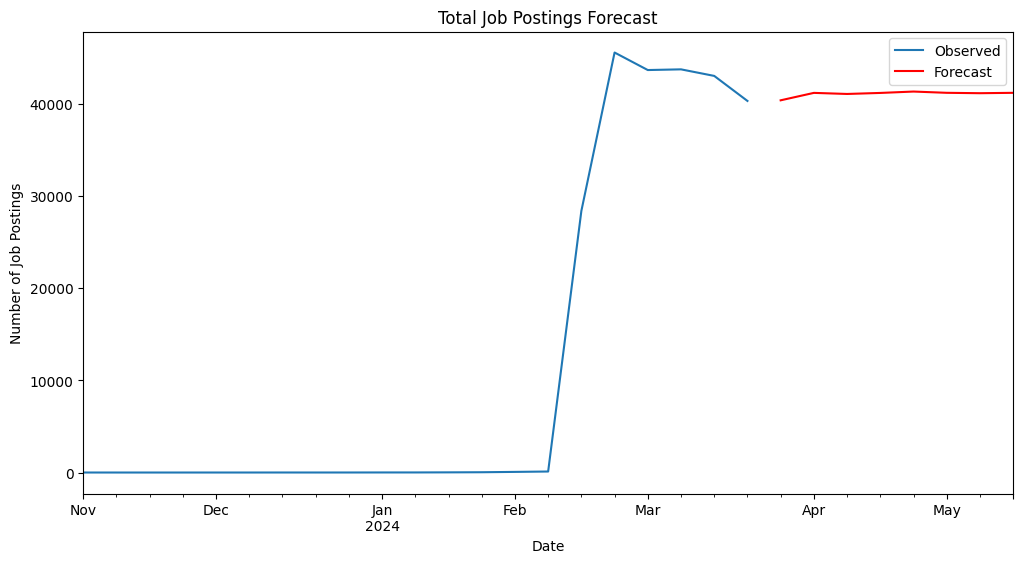


Forecasting Job Postings for Top 5 Categories:

Forecasting 'Other':
2024-03-31 00:00:00+00:00    31887.153476
2024-04-07 00:00:00+00:00    32695.088718
2024-04-14 00:00:00+00:00    32554.468392
2024-04-21 00:00:00+00:00    32641.549971
2024-04-28 00:00:00+00:00    32752.909935
2024-05-05 00:00:00+00:00    32596.533545
2024-05-12 00:00:00+00:00    32569.286615
2024-05-19 00:00:00+00:00    32621.008253
Freq: W-SUN, Name: predicted_mean, dtype: float64


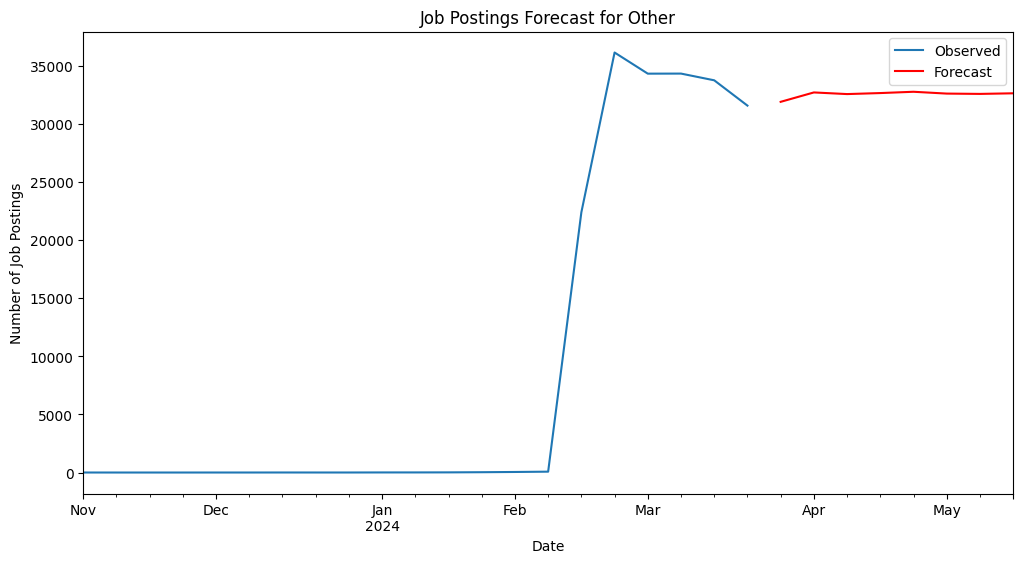


Forecasting 'Data Science':
2024-03-31 00:00:00+00:00    3269.969715
2024-04-07 00:00:00+00:00    3158.023594
2024-04-14 00:00:00+00:00    3181.212542
2024-04-21 00:00:00+00:00    3196.224952
2024-04-28 00:00:00+00:00    3207.381989
2024-05-05 00:00:00+00:00    3236.084955
2024-05-12 00:00:00+00:00    3262.495497
2024-05-19 00:00:00+00:00    3268.064581
Freq: W-SUN, Name: predicted_mean, dtype: float64


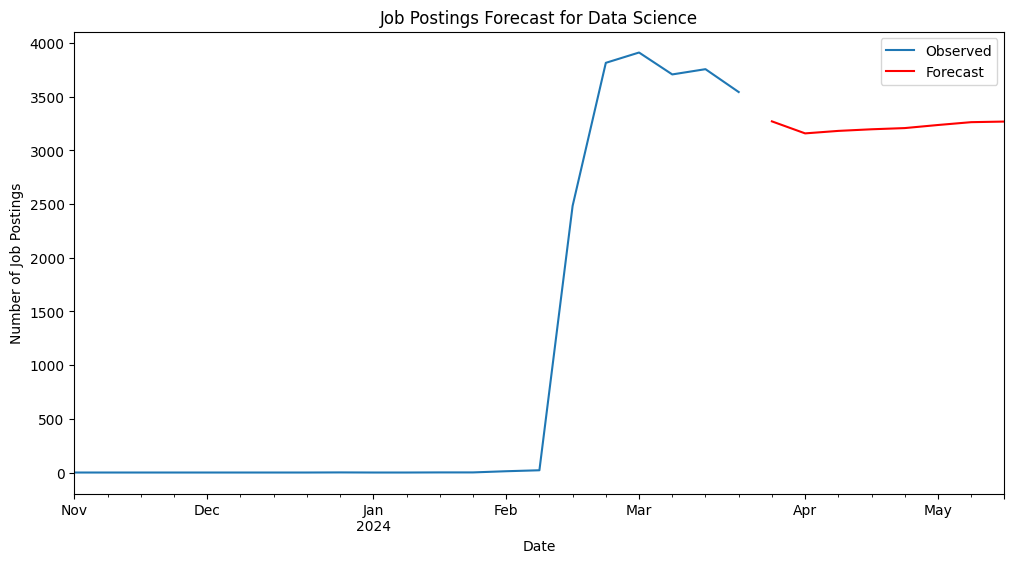


Forecasting 'Marketing':
2024-03-31 00:00:00+00:00    2151.903889
2024-04-07 00:00:00+00:00    2188.987873
2024-04-14 00:00:00+00:00    2181.855785
2024-04-21 00:00:00+00:00    2198.962479
2024-04-28 00:00:00+00:00    2201.684988
2024-05-05 00:00:00+00:00    2190.154932
2024-05-12 00:00:00+00:00    2191.291779
2024-05-19 00:00:00+00:00    2192.499754
Freq: W-SUN, Name: predicted_mean, dtype: float64


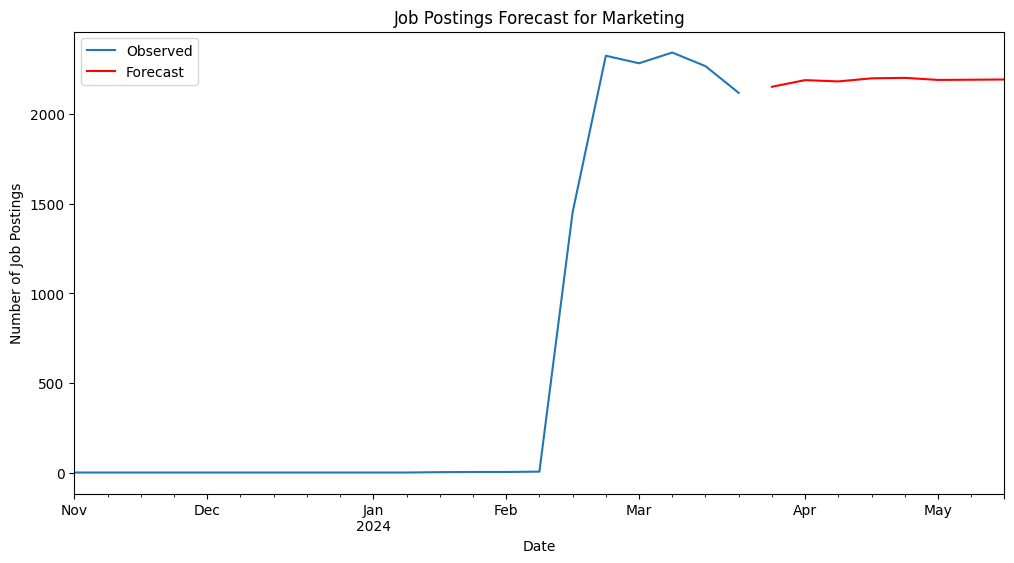


Forecasting 'Web Development':
2024-03-31 00:00:00+00:00    1557.861220
2024-04-07 00:00:00+00:00    1566.474851
2024-04-14 00:00:00+00:00    1558.841257
2024-04-21 00:00:00+00:00    1544.978102
2024-04-28 00:00:00+00:00    1558.420535
2024-05-05 00:00:00+00:00    1569.876852
2024-05-12 00:00:00+00:00    1568.713851
2024-05-19 00:00:00+00:00    1569.563480
Freq: W-SUN, Name: predicted_mean, dtype: float64


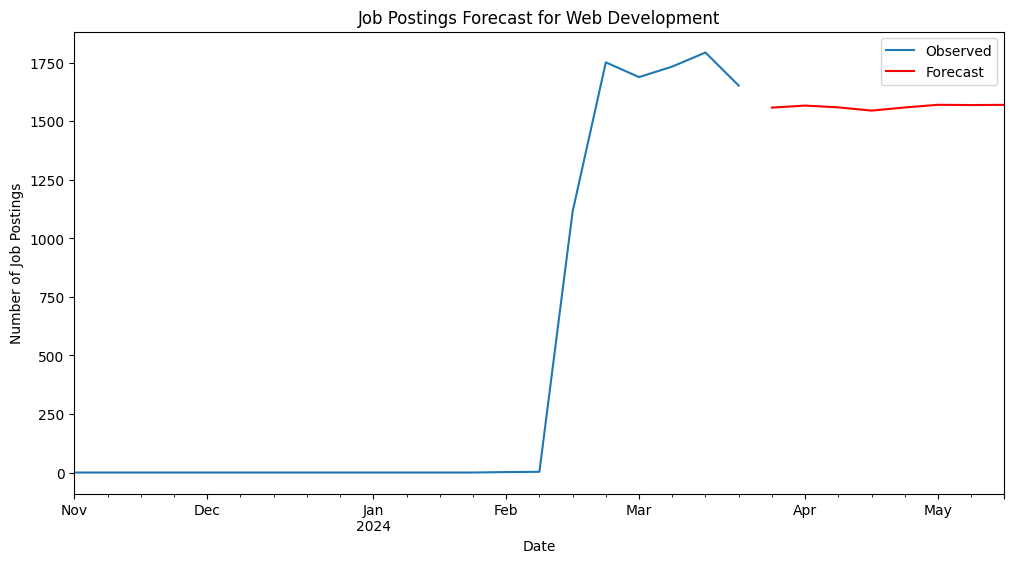


Forecasting 'Design':
2024-03-31 00:00:00+00:00    1396.194727
2024-04-07 00:00:00+00:00    1435.994322
2024-04-14 00:00:00+00:00    1425.807974
2024-04-21 00:00:00+00:00    1475.859449
2024-04-28 00:00:00+00:00    1439.910718
2024-05-05 00:00:00+00:00    1422.171866
2024-05-12 00:00:00+00:00    1456.803859
2024-05-19 00:00:00+00:00    1449.325724
Freq: W-SUN, Name: predicted_mean, dtype: float64


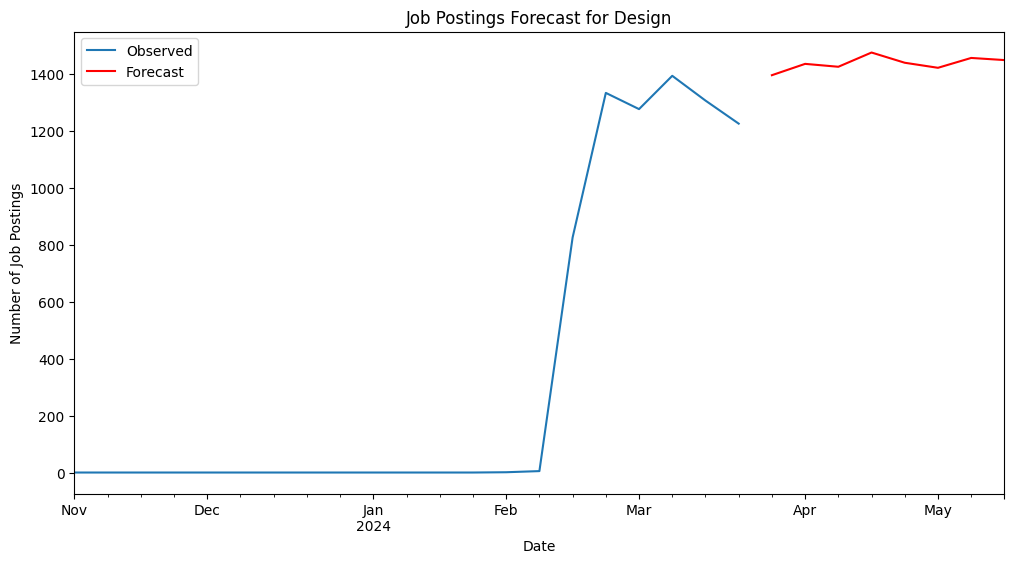


Forecasting Average Budget:
2024-03-31 00:00:00+00:00    147.642471
2024-04-07 00:00:00+00:00    148.536968
2024-04-14 00:00:00+00:00    147.221738
2024-04-21 00:00:00+00:00    147.859914
2024-04-28 00:00:00+00:00    148.064965
2024-05-05 00:00:00+00:00    147.502566
2024-05-12 00:00:00+00:00    147.884075
2024-05-19 00:00:00+00:00    147.875633
Freq: W-SUN, Name: predicted_mean, dtype: float64


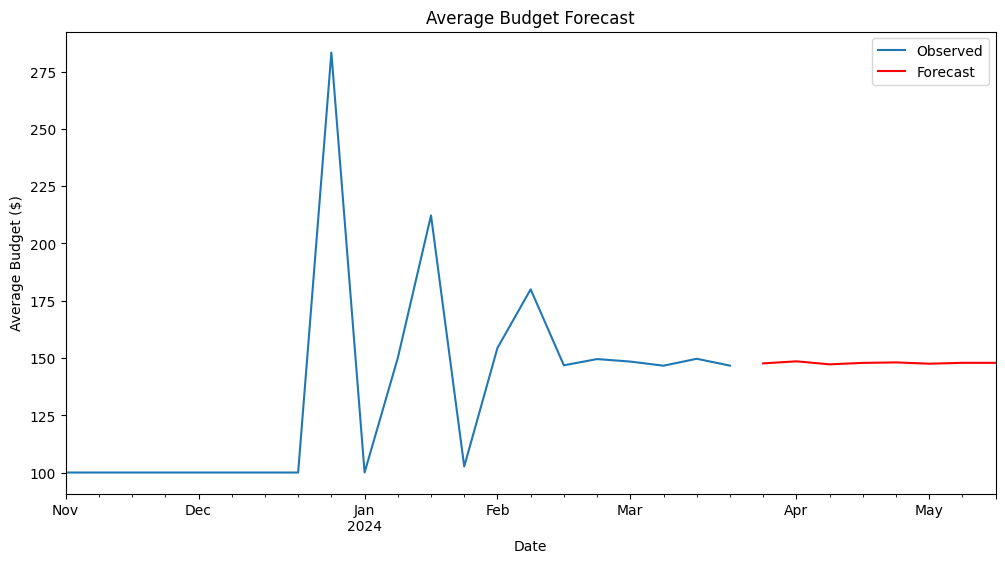

In [26]:
# Ensure 'published_date' is in datetime format and set as index
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df.dropna(subset=['published_date'], inplace=True)
df_time = df.set_index('published_date')

# Resample to weekly counts for forecasting (or monthly, depending on desired granularity)
# Weekly might capture more detail for short-term trends
weekly_job_counts = df_time.resample('W').size().fillna(0)
weekly_category_counts = df_time.groupby('job_category').resample('W').size().unstack(0, fill_value=0).fillna(0)
weekly_avg_budget = df_time['budget'].resample('W').mean().fillna(method='ffill') # Forward fill missing values

# --- Forecast Key Job Market Indicators ---

print("--- Forecasting Key Job Market Indicators ---")

forecast_periods = 8 # Forecast for the next 8 weeks (adjust as needed)

# Forecast Total Job Postings
print("\nForecasting Total Job Postings:")
try:
    model_total = ARIMA(weekly_job_counts, order=(5,1,0)) # Example order
    model_total_fit = model_total.fit()
    forecast_total = model_total_fit.forecast(steps=forecast_periods)
    print(forecast_total)
    plt.figure(figsize=(12, 6))
    weekly_job_counts.plot(label='Observed')
    forecast_total.plot(label='Forecast', color='red')
    plt.title('Total Job Postings Forecast')
    plt.xlabel('Date')
    plt.ylabel('Number of Job Postings')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Could not forecast total job postings: {e}")

# Forecast Job Postings for Top Categories (reusing top_categories from Task 3)
top_categories = weekly_category_counts.sum().sort_values(ascending=False).head(5).index
print(f"\nForecasting Job Postings for Top {len(top_categories)} Categories:")
category_forecasts = {}
for category in top_categories:
    print(f"\nForecasting '{category}':")
    try:
        model_category = ARIMA(weekly_category_counts[category], order=(5,1,0)) # Example order
        model_category_fit = model_category.fit()
        forecast_category = model_category_fit.forecast(steps=forecast_periods)
        category_forecasts[category] = forecast_category
        print(forecast_category)
        plt.figure(figsize=(12, 6))
        weekly_category_counts[category].plot(label='Observed')
        forecast_category.plot(label='Forecast', color='red')
        plt.title(f'Job Postings Forecast for {category}')
        plt.xlabel('Date')
        plt.ylabel('Number of Job Postings')
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"Could not forecast for category '{category}': {e}")

# Forecast Average Budget
print("\nForecasting Average Budget:")
try:
    model_budget = ARIMA(weekly_avg_budget, order=(5,1,0)) # Example order
    model_budget_fit = model_budget.fit()
    forecast_budget = model_budget_fit.forecast(steps=forecast_periods)
    print(forecast_budget)
    plt.figure(figsize=(12, 6))
    weekly_avg_budget.plot(label='Observed')
    forecast_budget.plot(label='Forecast', color='red')
    plt.title('Average Budget Forecast')
    plt.xlabel('Date')
    plt.ylabel('Average Budget ($)')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Could not forecast average budget: {e}")



